Testing out the MCR-ALS demixing using all of the 6 BP images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import nnls
import spectrochempy as scp

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.7© Copyright 2014-2023 - A.Travert & C.Fernandez @ LCS


In [2]:
## Make a function that takes in spectral data and returns the MCRALS object used in fitting
def fit_mcrals(np_file, St_guess):
    X = np.load(np_file)

#choose no normalization, euclid norm (spctral integral = 1), or spectral max norm; comment out the other two options
    #mcr = scp.MCRALS(log_level="INFO")
    #mcr = scp.MCRALS(log_level="INFO",normSpec="euclid")
    mcr = scp.MCRALS(log_level="INFO",normSpec="max")
    mcr.fit(X,St_guess)
    return mcr

def make_image(ax_in, concentrations, reshape):
    ps = np.reshape(concentrations, reshape)
    ax_in.imshow(ps, cmap='gray')

(6, 3)


 Spectra profile initialized with 3 components
 Initial concentration profile computed
 ***           ALS optimisation log            ***
 #iter     RSE / PCA        RSE / Exp      %change
 -------------------------------------------------
   1        9.605150       13.856360      -94.383622
   2        9.761743       13.963745        0.774993
   3        9.762091       13.963985        0.001713
 converged !


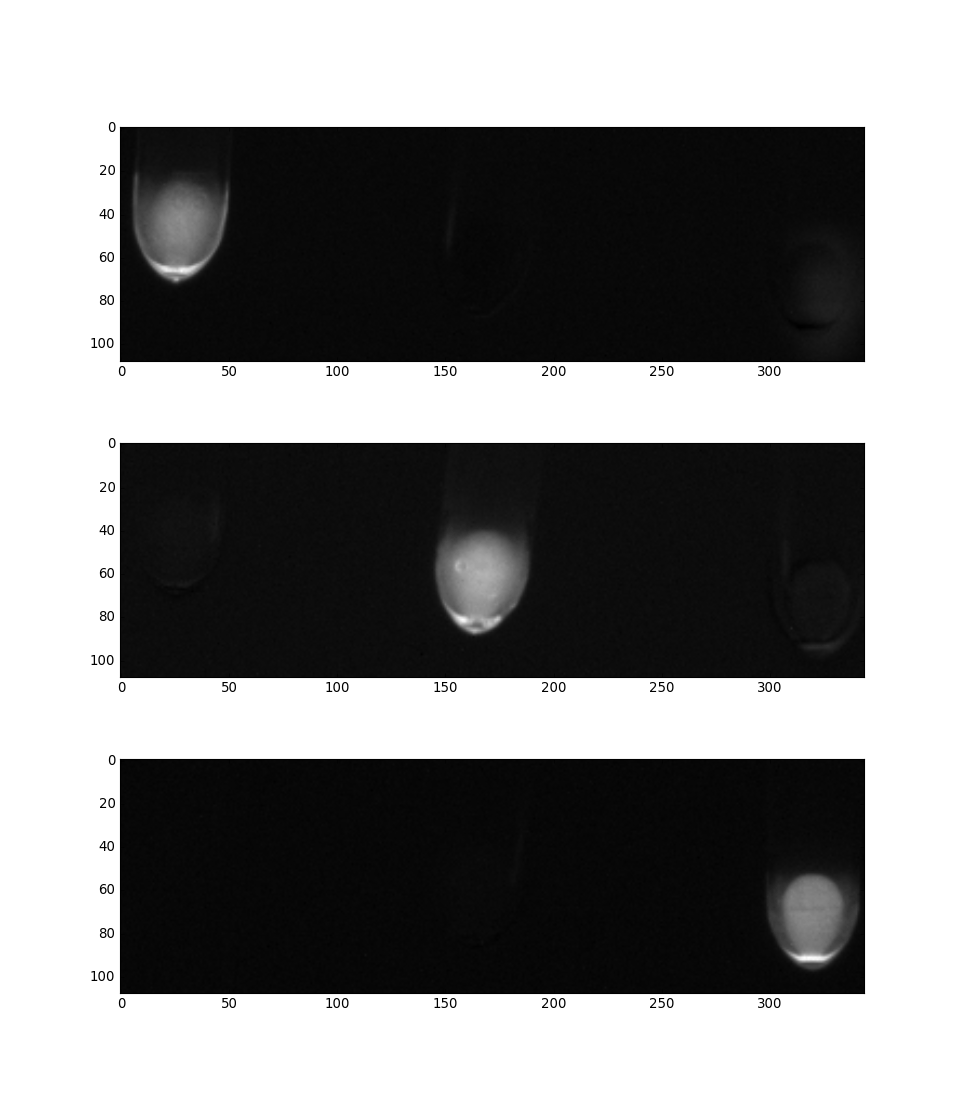

In [7]:
df_ref = pd.DataFrame({ 'Tube1': [1423.39, 1141.72, 228.56, 88.83, 2.69, 5.32],
                        'Tube2': [106.93, 355.45, 1436.32, 763.09, 31.24, 34.49],
                        'Tube3': [338.49, 65.13, 119.99, 344.86, 1149.40, 1393.15]})
df_ref.index=('BP1100', 'BP1150', 'BP1300', 'BP1350', 'BP1500', 'BP1550')

A = df_ref.to_numpy()
print(A.shape)


mcr_tube = fit_mcrals('../data/tube_input_matrix.npy', A.T)
tube_conc = np.array(mcr_tube.C)

tube_shape = (108,344)
# Convert the weights to an WxL image
sfig, ax = plt.subplots(3,1, figsize=(12,14))
make_image(ax[0], tube_conc[:,0], tube_shape)
make_image(ax[1], tube_conc[:,1], tube_shape)
make_image(ax[2], tube_conc[:,2], tube_shape)

<_Axes: xlabel='values $\\mathrm{}$', ylabel='values $\\mathrm{}$'>

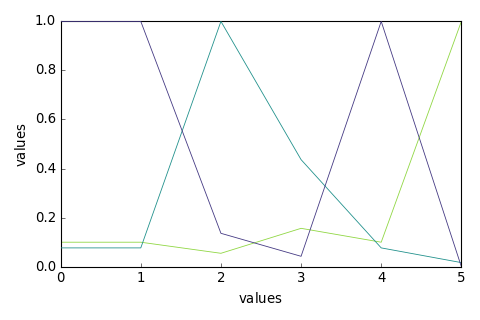

In [8]:
mcr_tube.St.plot()

 Spectra profile initialized with 3 components
 Initial concentration profile computed
 ***           ALS optimisation log            ***
 #iter     RSE / PCA        RSE / Exp      %change
 -------------------------------------------------
   1       70.232448       70.522904      -88.237747
   2       26.032833       40.970856      -41.904184
   3       21.809437       38.910629       -5.028520
   4       26.729221       41.644807        7.026815
   5       24.683075       40.209860       -3.445680
   6       25.256975       40.599538        0.969112
   7       25.030342       40.460823       -0.341668
   8       25.105364       40.507745        0.115969
   9       25.081130       40.492305       -0.038117
 converged !


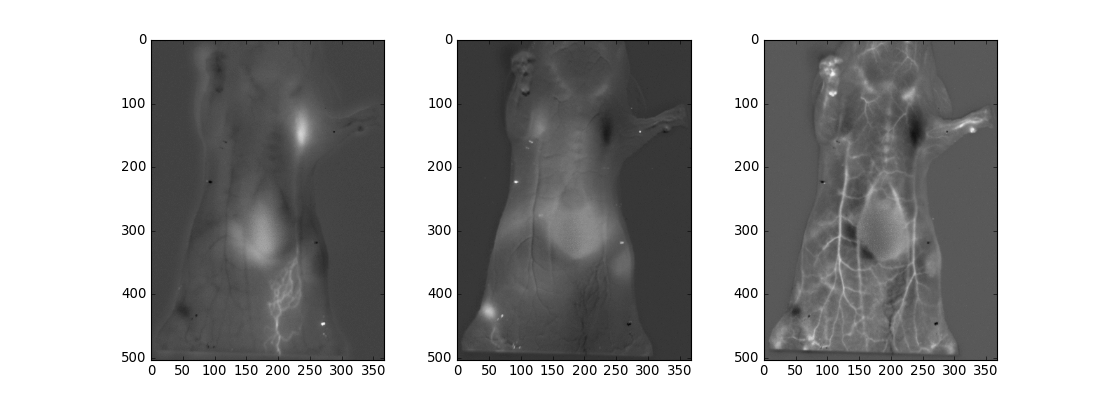

In [9]:

mcr_mouse = fit_mcrals('../data/mouse_input_matrix.npy', A.T)
#mcr_mouse = fit_mcrals('mouse_input_matrix.npy', mcr_tube.St)
mouse_conc = np.array(mcr_mouse.C)

mouse_shape = (504,368)
# Convert the weights to an WxL image
sfig, ax = plt.subplots(1,3, figsize=(14,5))
make_image(ax[0], mouse_conc[:,0], mouse_shape)
make_image(ax[1], mouse_conc[:,1], mouse_shape)
make_image(ax[2], mouse_conc[:,2], mouse_shape)

<_Axes: xlabel='values $\\mathrm{}$', ylabel='values $\\mathrm{}$'>

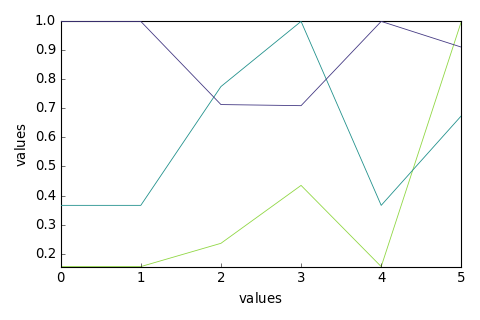

In [10]:
mcr_mouse.St.plot()